
1.   các mốc thời gian page hay đăng bài thường ngày
2.   keyword trong các bài viết

*   lượng reactions trong các bài viết




các mốc thời gian mà page hay đăng bài thường ngày

In [ ]:
pip install textblob

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
from textblob import TextBlob
import datetime as dt

In [ ]:
crawl_df = pd.read_excel('/content/ivivu.xlsx')

In [ ]:
crawl_df.head()

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time,video_ids,videos
0,733954298768825,Không chỉ được biết tới như Di Sản Văn Hoá Thế...,Không chỉ được biết tới như Di Sản Văn Hoá Thế...,NaN,NaN,2023-11-07 15:00:37,1.699369e+09,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,['https://scontent-iad3-1.xx.fbcdn.net/v/t39.3...,...,74,NaN,206739292685613,NaN,7.339543e+14,['733954268768828'],False,2023-11-07 17:16:19.167,NaN,NaN
1,733928358771419,"Trăng tròn ở vườn quốc gia Arches, thuộc bang ...","Trăng tròn ở vườn quốc gia Arches, thuộc bang ...",NaN,NaN,2023-11-07 14:00:35,1.699366e+09,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,['https://scontent-iad3-1.xx.fbcdn.net/v/t39.3...,...,46,NaN,206739292685613,NaN,7.339283e+14,['733928338771421'],False,2023-11-07 17:16:23.965,NaN,NaN
2,733902805440641,MÙA SĂN MÂY SAPA ☁☁☁\n\n🎉🎉🎉3N2Đ ở Sapa Jade Hi...,MÙA SĂN MÂY SAPA ☁☁☁\n\n🎉🎉🎉3N2Đ ở Sapa Jade Hi...,NaN,NaN,2023-11-07 13:00:36,1.699362e+09,https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...,https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...,['https://scontent-iad3-2.xx.fbcdn.net/v/t39.3...,...,4,NaN,206739292685613,NaN,7.339028e+14,['733902768773978'],False,2023-11-07 17:16:26.329,NaN,NaN
3,733874935443428,"Thủ đô Phnom Penh, Campuchia nhìn từ trên cao ...","Thủ đô Phnom Penh, Campuchia nhìn từ trên cao ...",NaN,NaN,2023-11-07 12:00:31,1.699358e+09,NaN,https://scontent-iad3-2.xx.fbcdn.net/v/t39.308...,[],...,122,NaN,206739292685613,NaN,7.338749e+14,['733874902110098'],False,2023-11-07 17:16:28.299,NaN,NaN
4,733837795447142,Resort có hồ bơi vô cực view thẳng ra biển cực...,Resort có hồ bơi vô cực view thẳng ra biển cực...,NaN,NaN,2023-11-07 10:34:18,1.699353e+09,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,['https://scontent-iad3-1.xx.fbcdn.net/v/t39.3...,...,13,NaN,206739292685613,NaN,7.338378e+14,['733837775447144'],False,2023-11-07 17:16:33.331,NaN,NaN


In [ ]:
res = []
for i in data_post:
    i = str(i)
    res.append(len(i))


In [ ]:
for i in range(0,100):
    crawl_df['factcheck'][i] = res[i]
crawl_df[['factcheck','reaction_count']]

<ipython-input-63-56d59ae76e68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crawl_df['factcheck'][i] = res[i]


,factcheck,reaction_count
0,185.0,74
1,63.0,46
2,559.0,4
3,65.0,122
4,562.0,13
...,...,...
95,80.0,0
96,420.0,0
97,570.0,0
98,3.0,0


In [ ]:
x = crawl_df[['len_post','reaction_count']]
y = x['reaction_count'].max()
x[x['reaction_count']==y]

,len_post,reaction_count
36,379.0,20109


In [ ]:
crawl_df[crawl_df['reaction_count']==20109]['post_url']

36    https://facebook.com/iVIVU/posts/732309085600013
Name: post_url, dtype: object

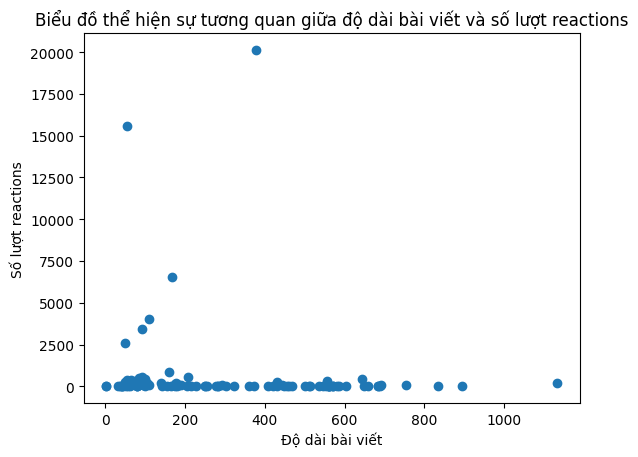

In [ ]:
plt.scatter(crawl_df['len_post'],crawl_df['reaction_count'])
plt.title('Biểu đồ thể hiện sự tương quan giữa độ dài bài viết và số lượt reactions')
plt.xlabel('Độ dài bài viết')
plt.ylabel('Số lượt reactions')
plt.show()

In [ ]:
crawl_df['hour'] = crawl_df['time']
for i in range(100):
     crawl_df['hour'][i]=crawl_df['time'][i].hour
crawl_df['hour']

<ipython-input-66-77733d0b3d0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crawl_df['hour'][i]=crawl_df['time'][i].hour


0     15
1     14
2     13
3     12
4     10
      ..
95    13
96    12
97    11
98    10
99     9
Name: hour, Length: 100, dtype: object

In [ ]:
x = crawl_df['hour'].value_counts()
x = x.sort_index()
x

0      8
1      2
2      8
3      8
4      4
5      1
6      4
7      4
8      3
9      5
10     6
11     4
12     6
13     8
14     8
15    10
16     3
17     1
19     2
20     2
21     2
22     1
Name: hour, dtype: int64

<Axes: >

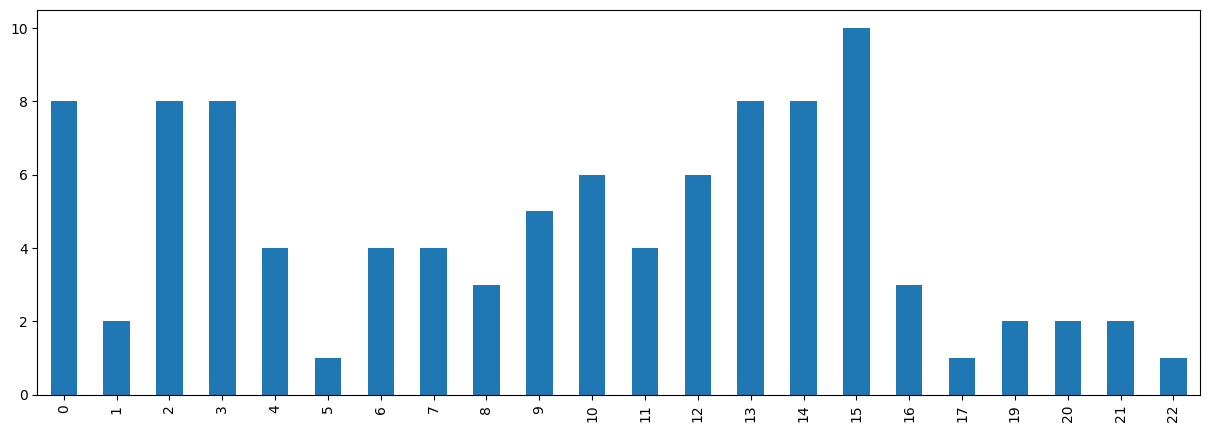

In [ ]:
x.plot(kind='bar',figsize=(15,5))

topword của các bài viết

In [ ]:
post_df_full = crawl_df

In [ ]:
post_df_full['post_text']=post_df_full['post_text'].astype(str)
text = ""
for i in post_df_full['post_text']:
     text=text+i+"\n"

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from collections import Counter
import re
danh_sach_tu = re.findall(r'\b\w+\b', text.lower())
counter = Counter(danh_sach_tu)
tu_xuat_hien_nhieu_nhat = counter.most_common(1)
print(tu_xuat_hien_nhieu_nhat)

[('miền', 83)]


Phân tích tâm trạng của bài viết

In [ ]:
from textblob import TextBlob
blob = TextBlob(text)
blob.sentiment

Sentiment(polarity=0.21079825347066727, subjectivity=0.5654276757725034)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(crawl_df['factcheck'], crawl_df['reaction_count'], test_size=0.2, random_state=42)
# Khởi tạo mô hình
model = LinearRegression()

# Huấn luyện mô hình
X_train = X_train.to_frame()
X_train = X_train.values.reshape(-1, 1)
model.fit(X_train, y_train)

# Dự đoán số lượt reactions của bài viết tiếp theo
bai_viet_tiep_theo = 500  # giả sử độ dài bài viết tiếp theo là 500
du_doan = model.predict([[bai_viet_tiep_theo]])

print(f'Số lượt reactions dự đoán cho bài viết tiếp theo với độ dài {bai_viet_tiep_theo} là: {du_doan[0]}')

Số lượt reactions dự đoán cho bài viết tiếp theo với độ dài 500 là: 495.5004617548197
